# 📊 Project Overview: Customer Credit Consumption Prediction


## 🧾 Objective:

To build a machine learning model that predicts the average credit card spend of customers for the next three months, based on their demographic data, financial behavior, and historical transaction patterns. The model helps in better customer profiling and supports targeted financial offerings by banking institutions.

## 🏦 Business Context:

In the credit card industry, understanding customer-level spending behavior is crucial for strategic decisions like personalized offers, risk assessment, and customer retention. This project aims to analyze customer data to uncover patterns in credit card consumption and forecast future spending for improved decision-making.

## 📁 Dataset:

The project uses three datasets:

Customer Demographics – Basic profile details like age, income, region, banking tenure, etc.

Behavioral Data – Credit/debit card transactions, loan history, asset holdings, and account activity over three months (April to June).

Credit Consumption – Target variable indicating average credit card consumption over the upcoming three months (July to September); partially missing and used for prediction.


## 🔧 Methodology:

Data Preprocessing: Merged datasets, handled missing values, outliers, and inconsistent data.

Feature Engineering: Created meaningful derived variables to enhance model learning (e.g., transaction frequency, credit utilization).

EDA: Explored key trends and correlations influencing credit card spending.

Modeling: Built and tuned regression models (e.g., Linear Regression, Decision Tree, etc.).

Evaluation: Assessed model performance using RMSPE (Root Mean Square Percentage Error).

Prediction: Generated credit consumption predictions for customers with missing target values.


## 🧠 Skills & Tools Used:
Languages: Python

Libraries: Pandas, NumPy, Scikit-learn, Matplotlib, Seaborn

Techniques: Data Cleaning, Feature Engineering, Regression Modeling, Model Evaluation, Predictive Analytics


## ✅ Outcome:
Achieved a predictive model capable of estimating future credit card spending with minimized error. The insights derived enable banks to personalize services and refine their customer engagement strategies.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
import pickle

In [2]:
#Importing Files
cust_behaviour = pd.read_excel("C:\\Users\\91981\\OneDrive\\Desktop\\AL_Module3\\ML_Project2\\11. Capstone Case Study - Predict Cred Card Consumption\\CustomerBehaviorData.xlsx")
cust_behaviour.head(3)

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,17051,2017.46,29066.66,15919.84,2197.00,3752.000,29798.00,1.0,4,35,...,47,20,41860.0,32734.75,80959.00,36,9,171200.0,Y,3448.84
1,11491,7687.00,1308.00,41888.92,2216.92,7060.530,3143.36,2.0,27,50,...,0,8,113367.0,60974.75,495080.00,5,3,15694.0,Y,3812.69
2,7433,9094.46,14825.95,3087.64,769.59,25602.595,1445.00,44.0,8,47,...,2,14,168000.0,425802.96,115707.38,7,58,28058.0,Y,9432.90


In [3]:
cust_demogra = pd.read_excel("C:\\Users\\91981\\OneDrive\\Desktop\\AL_Module3\\ML_Project2\\11. Capstone Case Study - Predict Cred Card Consumption\\CustomerDemographics.xlsx")
cust_demogra.head(3)

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,17051,current,M,30,MEDIUM,26.4,9,9,355,0
1,11491,current,M,37,LOW,14.4,7,7,485,0
2,7433,current,M,33,MEDIUM,3.2,1,1,764,0


In [4]:
cred_consump = pd.read_excel("C:\\Users\\91981\\OneDrive\\Desktop\\AL_Module3\\ML_Project2\\11. Capstone Case Study - Predict Cred Card Consumption\\CreditConsumptionData.xlsx")
cred_consump.head(3)

,ID,cc_cons
0,17051,16239.0
1,11491,39002.0
2,7433,21182.0


In [5]:
print(cust_behaviour.isnull().sum())
print('----------------------------------------------')
print(cust_demogra.isnull().sum())
print('----------------------------------------------')

print(cred_consump.isnull().sum())

ID                       0
cc_cons_apr              0
dc_cons_apr              0
cc_cons_may              1
dc_cons_may              1
cc_cons_jun              0
dc_cons_jun              1
cc_count_apr             1
cc_count_may             0
cc_count_jun             0
dc_count_apr             0
dc_count_may             0
dc_count_jun             0
card_lim                 0
personal_loan_active     0
vehicle_loan_active      0
personal_loan_closed     1
vehicle_loan_closed      0
investment_1             0
investment_2             0
investment_3             2
investment_4             0
debit_amount_apr         0
credit_amount_apr        0
debit_count_apr          1
credit_count_apr         0
max_credit_amount_apr    0
debit_amount_may         0
credit_amount_may        0
credit_count_may         0
debit_count_may          0
max_credit_amount_may    0
debit_amount_jun         0
credit_amount_jun        0
credit_count_jun         0
debit_count_jun          0
max_credit_amount_jun    0
l

In [6]:
#Dropping NUll values 
cust_behaviour.dropna(inplace=True)

In [7]:
# Dropping Null values
cust_behaviour.dropna(inplace = True)

## Combining all three tables to make a commom Dataset Table 

In [8]:
df = pd.merge(left = cust_behaviour , right= cust_demogra , how = 'left' ,on = 'ID' ).merge(right=cred_consump , how= 'left',on = 'ID')

In [9]:
df.head()

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons
0,17051,2017.46,29066.66,15919.84,2197.00,3752.000,29798.00,1.0,4,35,...,current,M,30,MEDIUM,26.4,9,9,355,0,16239.0
1,11491,7687.00,1308.00,41888.92,2216.92,7060.530,3143.36,2.0,27,50,...,current,M,37,LOW,14.4,7,7,485,0,39002.0
2,7433,9094.46,14825.95,3087.64,769.59,25602.595,1445.00,44.0,8,47,...,current,M,33,MEDIUM,3.2,1,1,764,0,21182.0
3,14606,3126.00,4616.33,8676.80,5923.00,6717.000,18747.00,4.0,30,1,...,current,M,63,LOW,10.2,6,6,863,0,8123.0
4,8381,24988.72,10091.23,10132.00,3477.00,4667.000,511.00,2.0,8,5,...,saving,M,33,MEDIUM,26.4,6,6,523,0,28282.0


In [10]:
df.shape

(19991, 49)

In [11]:
df.isnull().sum()

ID                                 0
cc_cons_apr                        0
dc_cons_apr                        0
cc_cons_may                        0
dc_cons_may                        0
cc_cons_jun                        0
dc_cons_jun                        0
cc_count_apr                       0
cc_count_may                       0
cc_count_jun                       0
dc_count_apr                       0
dc_count_may                       0
dc_count_jun                       0
card_lim                           0
personal_loan_active               0
vehicle_loan_active                0
personal_loan_closed               0
vehicle_loan_closed                0
investment_1                       0
investment_2                       0
investment_3                       0
investment_4                       0
debit_amount_apr                   0
credit_amount_apr                  0
debit_count_apr                    0
credit_count_apr                   0
max_credit_amount_apr              0
d

In [12]:
test_df = df[df['cc_cons'].isnull()]

In [13]:
test_df.to_csv('testtt.csv',index = False)

In [14]:
train_df = df[~df['cc_cons'].isnull()]

In [15]:
train_df.shape,test_df.shape 

((14993, 49), (4998, 49))

## Outliers Detection 

In [16]:
x_temp = df.drop('cc_cons',axis = 1)

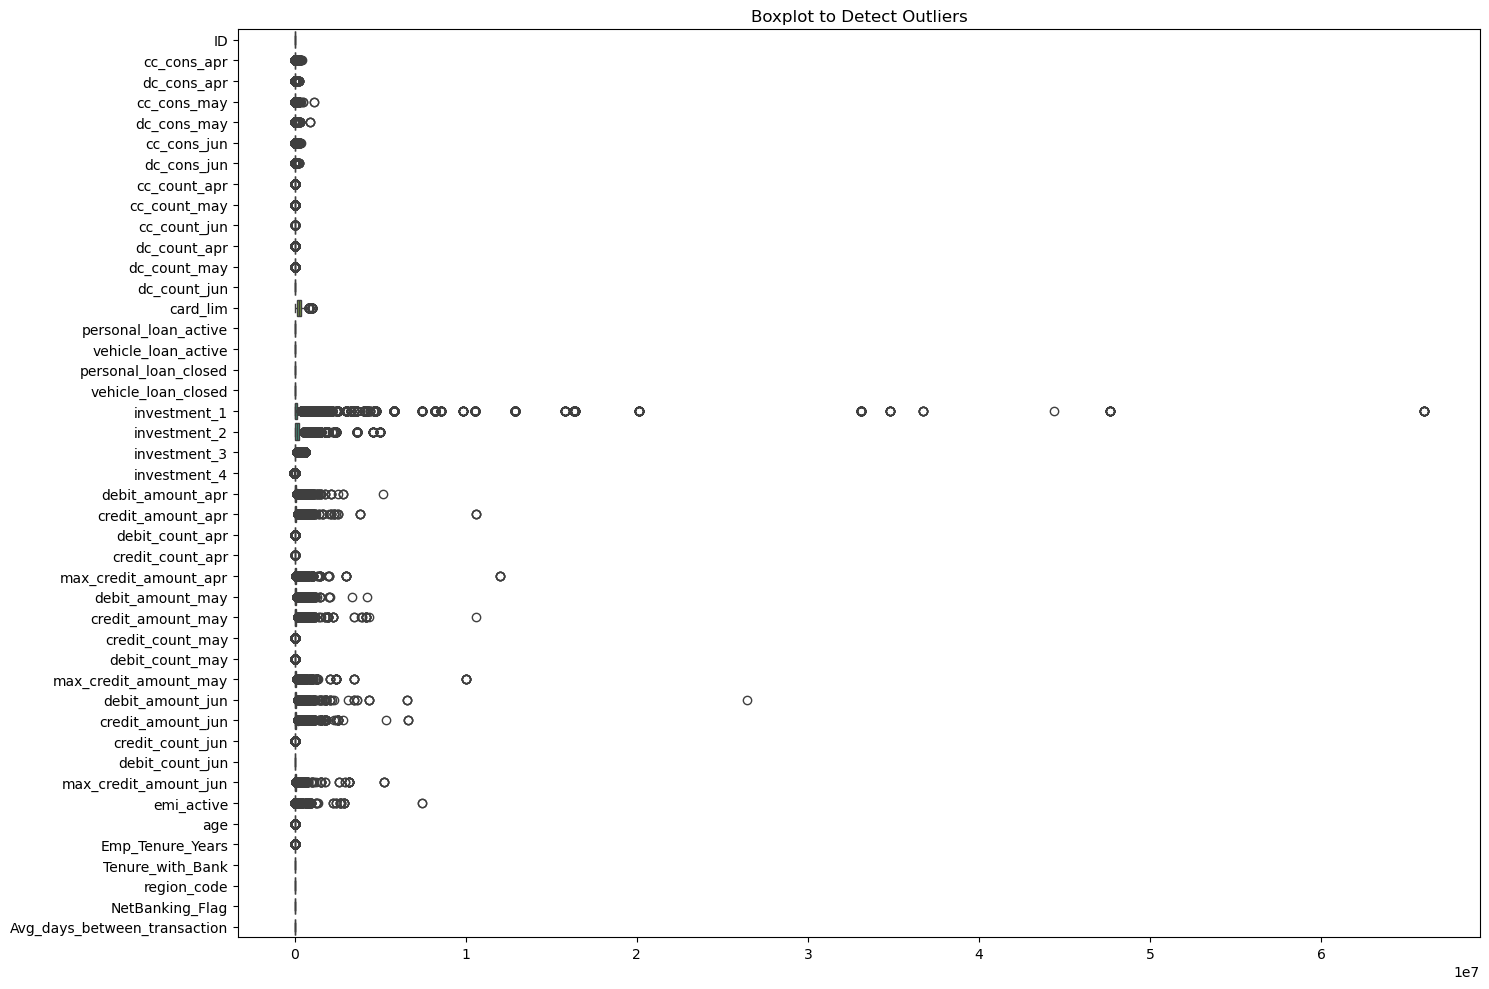

In [17]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=x_temp, orient='h')
plt.title('Boxplot to Detect Outliers')
plt.tight_layout()
plt.show()

#### We will use Lasso Regressor to deal with Outliers and do feature selection after standardization of the data 

## Exploratory Data Analysis

In [18]:
train_df.describe()

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,debit_count_jun,max_credit_amount_jun,emi_active,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons
count,14993.000000,14993.000000,14993.000000,1.499300e+04,14993.000000,14993.000000,14993.000000,14993.000000,14993.00000,14993.000000,...,14993.000000,1.499300e+04,1.499300e+04,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,10032.206230,17961.834649,8168.237205,1.633949e+04,7704.676979,12129.386670,7099.351901,41.500700,33.48516,41.506103,...,44.647969,5.257668e+04,1.575568e+04,47.766624,15.185073,5.510438,5.510438,598.397385,0.719602,9369.569257
std,5761.048272,25192.717712,14769.893627,2.706671e+04,18991.347323,18491.427033,13254.450825,97.453103,49.54702,47.350281,...,35.088853,1.282776e+05,1.179405e+05,30.573014,20.316444,2.866058,2.866058,220.085924,0.449208,7554.028948
min,1.000000,253.000000,19.350000,1.570000e+02,22.000000,65.000000,62.000000,1.000000,1.00000,1.000000,...,0.000000,6.000000e-02,0.000000e+00,25.000000,0.500000,1.000000,1.000000,123.000000,0.000000,610.099000
25%,5059.000000,4411.220000,1634.000000,3.638000e+03,1643.500000,3004.500000,1358.000000,5.000000,8.00000,10.000000,...,12.000000,1.903800e+04,1.548510e+03,33.000000,5.100000,3.000000,3.000000,424.000000,0.000000,4808.670000
50%,10053.000000,10288.100000,3994.800000,8.690170e+03,3820.000000,6655.250000,3327.000000,10.000000,23.00000,35.000000,...,38.000000,3.042500e+04,3.953580e+03,40.000000,9.900000,6.000000,6.000000,623.000000,1.000000,7409.948800
75%,15016.000000,21410.250000,9339.020000,1.895130e+04,8212.000000,14247.000000,7597.000000,44.000000,43.00000,61.000000,...,73.000000,5.320200e+04,9.372410e+03,53.000000,18.000000,8.000000,8.000000,799.000000,1.000000,11518.657600
max,19998.000000,441031.330000,229255.000000,1.117246e+06,911223.490000,382914.100000,233384.000000,531.000000,601.00000,653.000000,...,133.000000,5.200000e+06,7.447125e+06,223.000000,203.000000,10.000000,10.000000,974.000000,1.000000,160735.934800


<Axes: xlabel='cc_cons', ylabel='Count'>

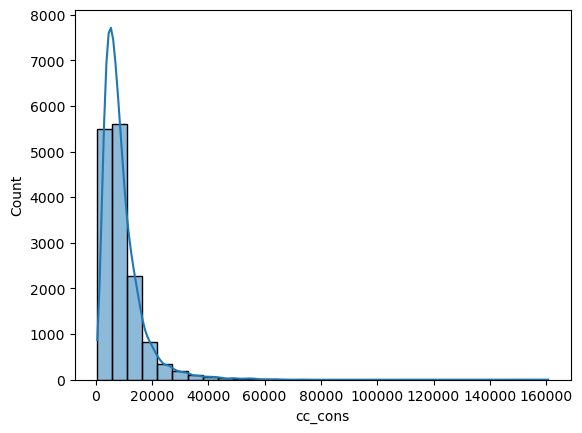

In [19]:
sns.histplot(train_df['cc_cons'],bins=30,kde = True)

### Here we can see that our Dependent variable (Y) is  a Right Skewed distribution |  Log Normal Distribution 

In [20]:
# To convert it into a Normal | Guassion distribution we should use the natural log to normalize it 
train_df['cc_cons'] = np.log(train_df['cc_cons'])

In [21]:
train_df['cc_cons']

0         9.695171
1        10.571368
2         9.960907
3         9.002455
4        10.249981
           ...    
14988     9.026953
14989     8.054398
14990     9.376193
14991     8.199860
14992     8.160732
Name: cc_cons, Length: 14993, dtype: float64

<Axes: xlabel='cc_cons', ylabel='Count'>

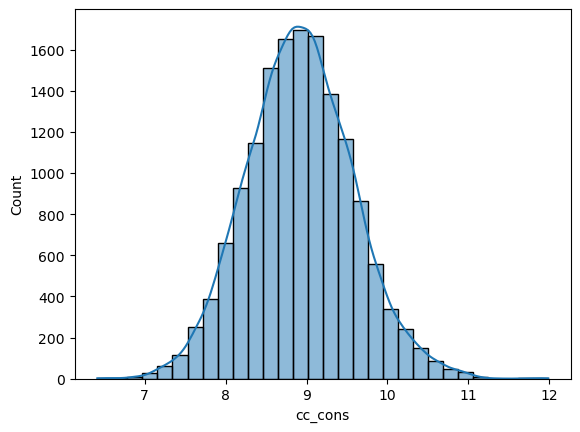

In [22]:
sns.histplot(train_df['cc_cons'],bins=30,kde = True)

## Correlation Check 

In [23]:
corr_check = test_df.select_dtypes('number').corr()

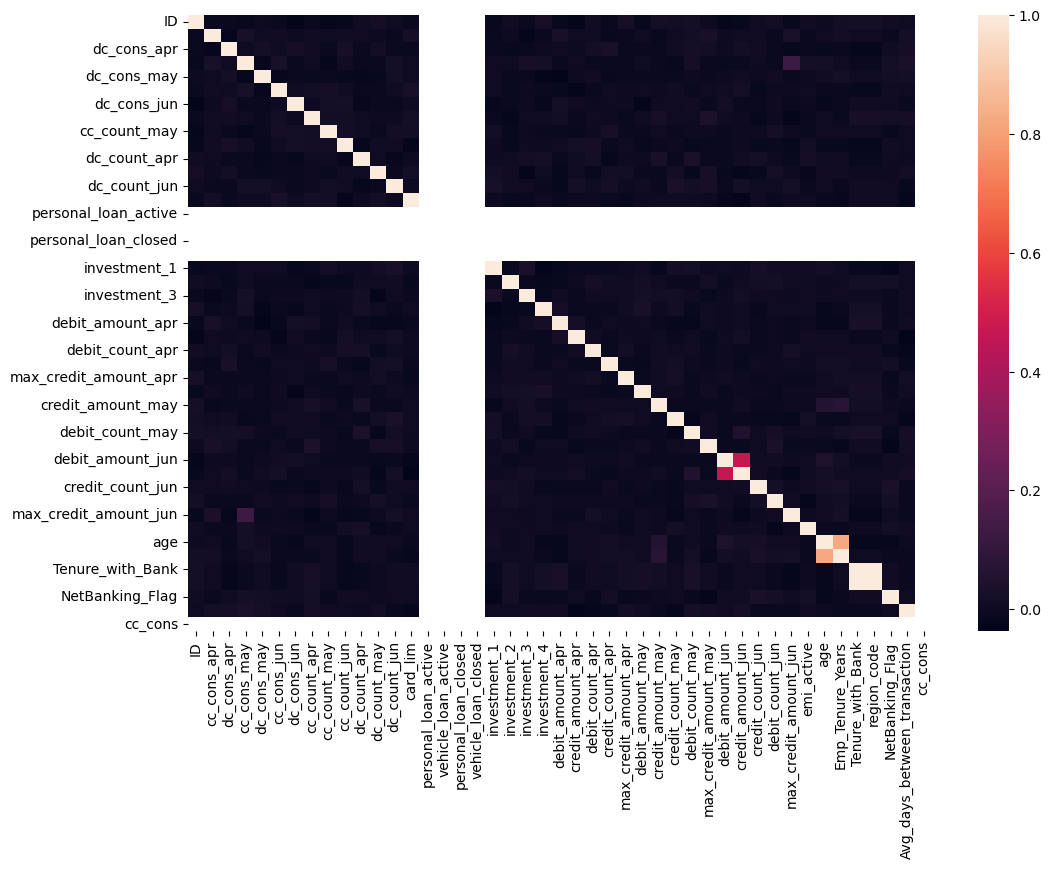

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_check)
plt.show()

## Handling Categorical values 

In [25]:
train_df.select_dtypes('object').head(2)

,loan_enq,account_type,gender,Income
0,Y,current,M,MEDIUM
1,Y,current,M,LOW


In [27]:
cat_cols = ['loan_enq','account_type','gender','Income']
x_encoded = pd.get_dummies(train_df,columns = cat_cols, drop_first=True)

In [28]:
x_encoded

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons,account_type_saving,gender_M,Income_LOW,Income_MEDIUM
0,17051,2017.46,29066.66,15919.84,2197.00,3752.000,29798.00,1.0,4,35,...,26.4,9,9,355,0,9.695171,False,True,False,True
1,11491,7687.00,1308.00,41888.92,2216.92,7060.530,3143.36,2.0,27,50,...,14.4,7,7,485,0,10.571368,False,True,True,False
2,7433,9094.46,14825.95,3087.64,769.59,25602.595,1445.00,44.0,8,47,...,3.2,1,1,764,0,9.960907,False,True,False,True
3,14606,3126.00,4616.33,8676.80,5923.00,6717.000,18747.00,4.0,30,1,...,10.2,6,6,863,0,9.002455,False,True,True,False
4,8381,24988.72,10091.23,10132.00,3477.00,4667.000,511.00,2.0,8,5,...,26.4,6,6,523,0,10.249981,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,6995,6045.34,4526.20,26897.50,5673.83,8885.000,12021.95,4.0,27,3,...,3.9,10,10,914,1,9.026953,False,False,True,False
14989,10376,5387.00,1774.00,11494.92,588.00,3239.000,4086.52,28.0,1,87,...,16.2,4,4,683,1,8.054398,False,True,False,True
14990,2181,9577.00,2948.84,49228.00,2445.00,1378.860,24148.83,43.0,32,74,...,1.5,10,10,394,0,9.376193,False,True,False,True
14991,18417,5305.84,1839.01,17903.40,527.17,10829.000,3754.00,66.0,4,84,...,18.9,9,9,647,0,8.199860,False,True,False,True


## Handling and Treating Outliers 

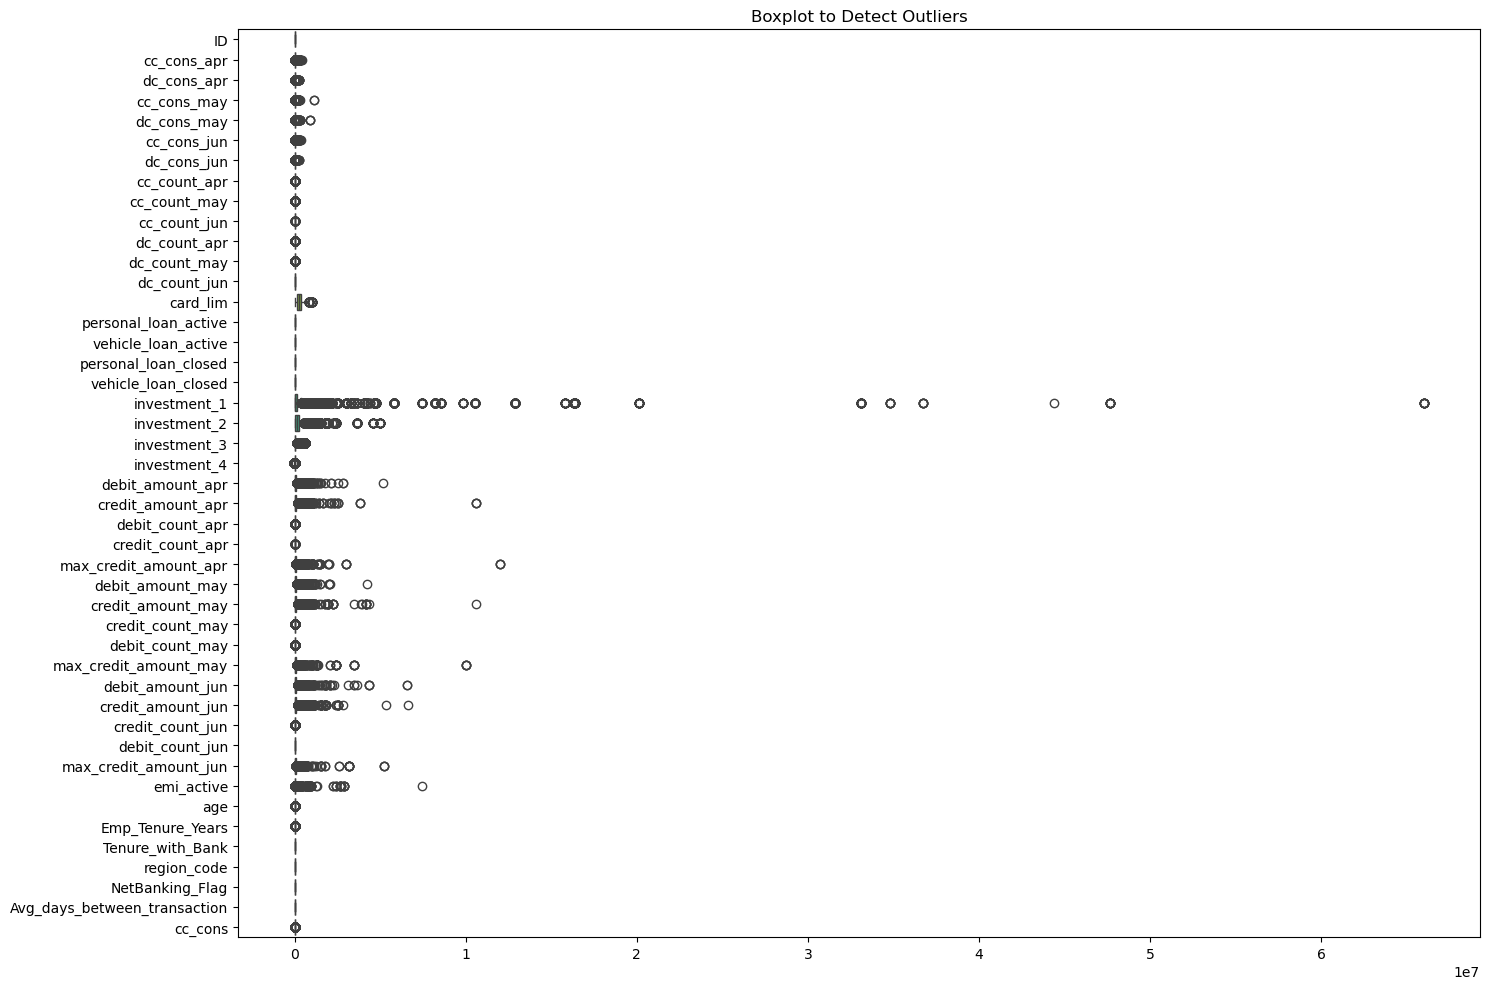

In [29]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=train_df, orient='h')
plt.title('Boxplot to Detect Outliers')
plt.tight_layout()
plt.show()

In [30]:
def cap_outliers(df):
    df = df.copy()
    num_cols = df.select_dtypes(include='number')
    Q1 = num_cols.quantile(0.25)
    Q3 = num_cols.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[num_cols.columns] = num_cols.clip(lower=lower, upper=upper, axis=1)
    return df

In [31]:
train_df = cap_outliers(train_df)

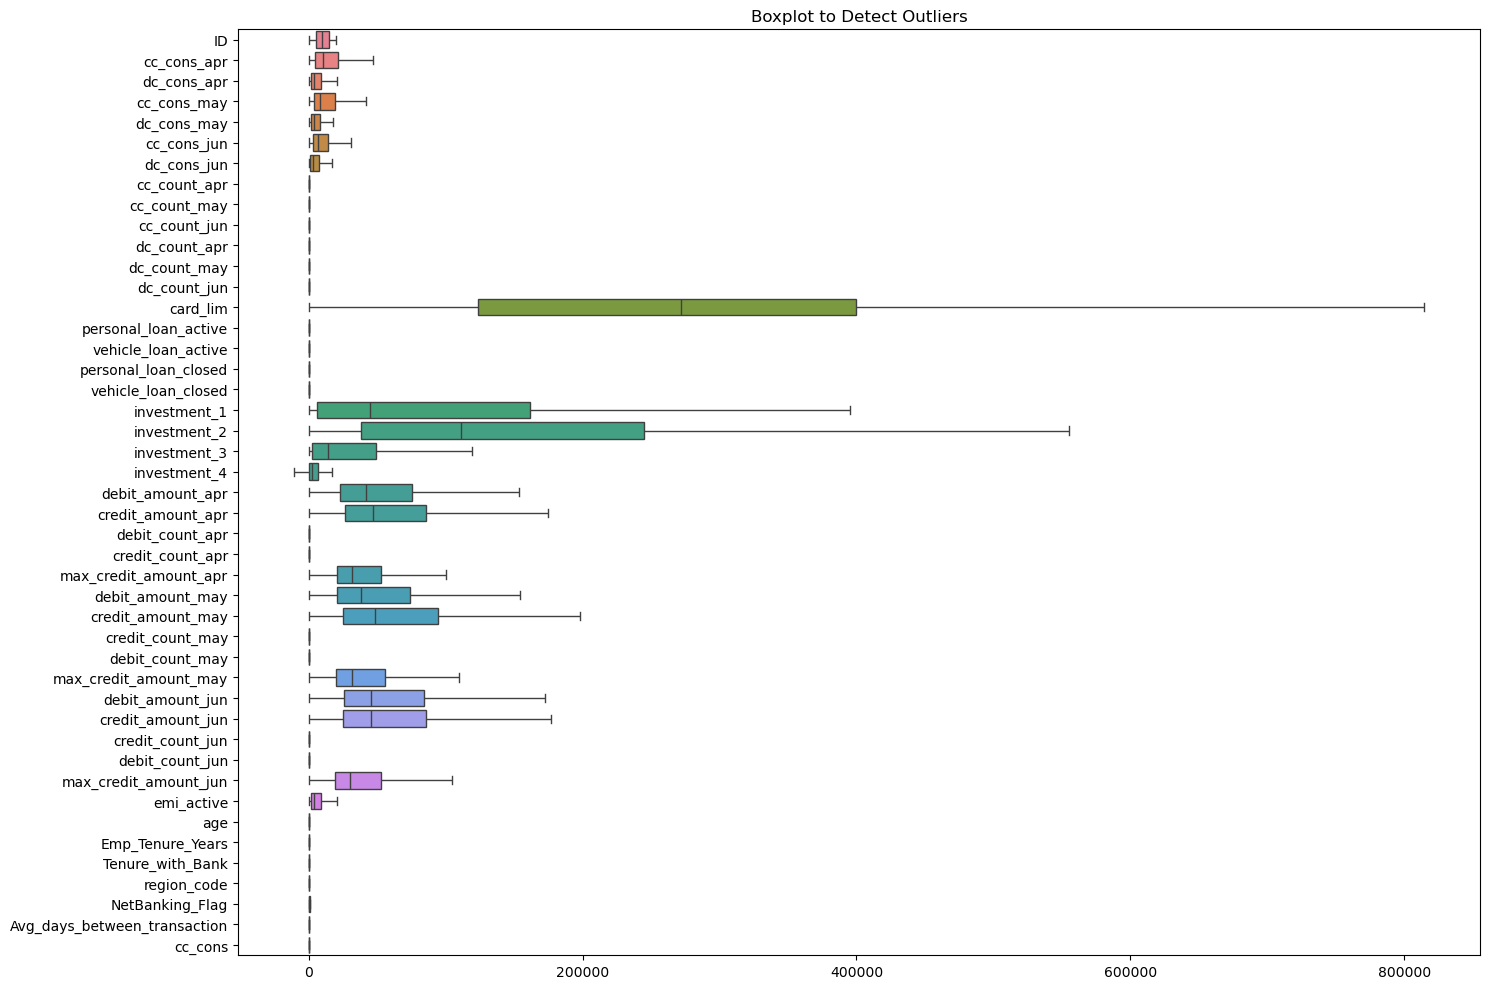

In [32]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=train_df, orient='h')
plt.title('Boxplot to Detect Outliers')
plt.tight_layout()
plt.show()

## Standardization 

In [33]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [35]:
cols_to_keep = [col for col in x_encoded.columns if col != 'cc_cons']

x = x_encoded.loc[:, cols_to_keep]
y = x_encoded.loc[:, 'cc_cons']

In [36]:
x_ft = ss.fit_transform(x)
x_ft = pd.DataFrame(x_ft)

In [37]:
import pickle
with open('./standardscaler.pkl','wb') as file:
    pickle.dump(ss,file)

## Train Test Split 

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x_ft,y,test_size=0.20,random_state=42)

In [40]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((11994, 48), (2999, 48), (11994,), (2999,))

In [41]:
y_test = np.exp(y_test)

## Model Selection 

LINEAR REGRESSION 

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [43]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [44]:
lr_pred = lr.predict(x_test)
lr_pred = np.exp(lr_pred)

In [45]:
def get_rmse_percen_error(pred,ytest):
     # Convert to arrays
    y_true = np.array(ytest)
    y_pred = np.array(pred)

    # RMSE
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    # RMSPE (skip 0s to avoid divide-by-zero)
    mask = y_true != 0
    rmspe = np.sqrt(np.mean(np.square((y_true[mask] - y_pred[mask]) / y_true[mask]))) * 100

    # Display
    print(f"✅ RMSE: {rmse:,.2f}")
    print(f"✅ RMSPE: {rmspe:.2f}%")


In [46]:
# Applying it on the Test dataset
get_rmse_percen_error(lr_pred,y_test)

✅ RMSE: 10,369.05
✅ RMSPE: 48.80%


DECISION TREE REGRESSOR

In [47]:
from sklearn.tree import DecisionTreeRegressor

In [48]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr = lr.predict(x_test)
pred_dtr = np.exp(pred_dtr)
get_rmse_percen_error(pred_dtr,y_test)

✅ RMSE: 10,369.05
✅ RMSPE: 48.80%


RANDOM FOREST REGRESSOR

In [49]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
params ={'max_depth':[None,2,3,4,5,7,9],
        'n_estimators': [50,100,150, 200]}

In [50]:
rgb = RandomForestRegressor()
random_search = RandomizedSearchCV(estimator=rgb, param_distributions=params,cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)


random_search.fit(x_train,y_train)
pred_rgb = random_search.predict(x_test)
pred_rgb = np.exp(pred_rgb)
get_rmse_percen_error(pred_rgb,y_test)

✅ RMSE: 3,281.86
✅ RMSPE: 27.64%


Randomized SEARCH CV

In [51]:
params ={'max_depth':[None,2,3,4,5,7,9],
        'min_samples_split' : list(np.arange(1,30,2))}

In [52]:
dt1 = DecisionTreeRegressor()
gc = RandomizedSearchCV(dt1,params)
gc.fit(x_train,y_train)
pred_gc = gc.predict(x_test)
pred_gc = np.exp(pred_gc)
get_rmse_percen_error(pred_gc,y_test)

✅ RMSE: 3,844.87
✅ RMSPE: 34.66%


GRADIENT BOOSTING REGRESSOR

In [53]:
from sklearn.ensemble import GradientBoostingRegressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3]
}

In [54]:
gb = GradientBoostingRegressor()
rando_search = RandomizedSearchCV(estimator=gb, param_distributions=param_grid,cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)


rando_search.fit(x_train,y_train)
pred_gb = rando_search.predict(x_test)
pred_gb = np.exp(pred_gb)
get_rmse_percen_error(pred_gb,y_test)

✅ RMSE: 2,890.14
✅ RMSPE: 26.80%


#### LightGBM + Optuna tuning 

In [55]:
!pip install optuna-integration[lightgbm]

In [56]:
import lightgbm as lgb
import optuna
from optuna.integration import LightGBMPruningCallback

In [57]:
def objective(trial):
    params = {
        'objective': 'regression',
        'metric': 'rmse',
        'boosting_type': 'gbdt',
        'verbosity': -1,
        'random_state': 42,
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
    }

    model = lgb.LGBMRegressor(**params)
    score = cross_val_score(model, x_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
    return -1 * score.mean()

In [58]:
from sklearn.model_selection import cross_val_score

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30, timeout=300)  # Reduce trials/time for faster tuning

# Show best results
print("Best Parameters:", study.best_params)
print("Best RMSE (CV):", study.best_value)

# Train final model on best params
best_params = study.best_params
best_params.update({
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'random_state': 42
})


[I 2025-07-16 22:24:31,196] A new study created in memory with name: no-name-d646b68e-48ac-4828-995e-8cc3c829ae07
[I 2025-07-16 22:24:35,389] Trial 0 finished with value: 0.26410476164567404 and parameters: {'num_leaves': 115, 'max_depth': 13, 'learning_rate': 0.18323593857050335}. Best is trial 0 with value: 0.26410476164567404.
[I 2025-07-16 22:24:38,042] Trial 1 finished with value: 0.25798406136478386 and parameters: {'num_leaves': 52, 'max_depth': 11, 'learning_rate': 0.1425061707645394}. Best is trial 1 with value: 0.25798406136478386.
[I 2025-07-16 22:24:39,805] Trial 2 finished with value: 0.2547996855726596 and parameters: {'num_leaves': 62, 'max_depth': 7, 'learning_rate': 0.117356765543501}. Best is trial 2 with value: 0.2547996855726596.
[I 2025-07-16 22:24:41,212] Trial 3 finished with value: 0.25434174999959974 and parameters: {'num_leaves': 72, 'max_depth': 6, 'learning_rate': 0.11124691411291028}. Best is trial 3 with value: 0.25434174999959974.
[I 2025-07-16 22:24:42,7

Best Parameters: {'num_leaves': 62, 'max_depth': 4, 'learning_rate': 0.09939536305095711}
Best RMSE (CV): 0.2518891076096965


In [59]:
lgbm = lgb.LGBMRegressor(**best_params)
lgbm.fit(x_train, y_train)

LGBMRegressor(learning_rate=0.09939536305095711, max_depth=4, metric='rmse',
              num_leaves=62, objective='regression', random_state=42)

In [60]:
pred_lgbm = lgbm.predict(x_test)
pred_lgbm = np.exp(pred_lgbm)

In [61]:
get_rmse_percen_error(pred_lgbm,y_test)

✅ RMSE: 2,954.87
✅ RMSPE: 26.35%


### XGboost regressor

In [63]:
!pip install xgboost

In [64]:
import xgboost as xgb

In [65]:
model_xgb = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

In [66]:
model_xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [67]:
pred_xgb = model_xgb.predict(x_test)
pred_xgb = np.exp(pred_xgb)

In [68]:
get_rmse_percen_error(pred_xgb,y_test)

✅ RMSE: 3,175.69
✅ RMSPE: 26.57%


### CatBoost regressor

In [69]:
!pip install catboost

In [70]:
from catboost import CatBoostRegressor

In [71]:
model_cat = CatBoostRegressor(
    iterations=200,
    learning_rate=0.05,
    depth=6,
    loss_function='RMSE',
    random_seed=42,
    verbose=0  
)

In [72]:
model_cat.fit(x_train,y_train)

In [73]:
pred_cat = model_cat.predict(x_test)
pred_cat = np.exp(pred_cat)

In [74]:
get_rmse_percen_error(pred_cat,y_test)

✅ RMSE: 3,063.27
✅ RMSPE: 26.52%


## BEST MODEL - LightGBM + OptunaCV

In [75]:
with open('./BestModel_lgbm.pkl','wb') as file:
    pickle.dump(lgbm,file)